**Practice Ridge LASSO and ElasticNet Regression***

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
from scipy import stats
import statistics
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
absentee = pd.read_csv('Absenteeism_at_work.tsv', sep='\t',  lineterminator='\n')

In [135]:
absentee.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours\r
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [136]:
absentee = absentee.rename(columns={'Absenteeism time in hours\r': 'Absence'})

**List Columns to make sure column renamed**

In [137]:
absentee.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absence'],
      dtype='object')

** Describe data **

In [138]:
absentee.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absence
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


**Find any NA values**

In [139]:
absentee.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absence                            0
dtype: int64

**Encode Absence**

In [140]:
absentee['Absence'] = np.where(absentee['Absence']!= 0, 1, 0)

In [141]:
absentee['Absence']

0      1
1      0
2      1
3      1
4      1
      ..
735    1
736    1
737    0
738    0
739    0
Name: Absence, Length: 740, dtype: int32

In [142]:
absentee.rename(columns = {'Work load Average/day':'Work_load'}
                , inplace = True)

In [143]:
absentee.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absence
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,1
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,1
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,1
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,1


**Drop any columns having to do with absence**

In [144]:
absentee = absentee.drop(columns=['ID','Reason for absence','Month of absence'])

**Correlation Map of remaining Columns**

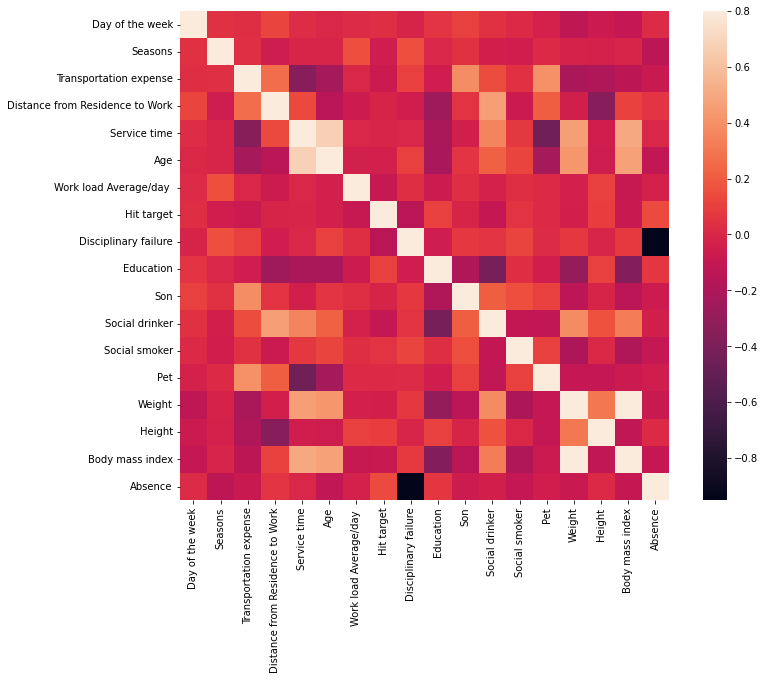

In [145]:
corrmat = absentee.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [146]:
absentee.cov()

,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absence
Day of the week,2.021159,0.073490,3.235146,2.489524,0.132484,0.041069,0.868798,0.166487,-0.004864,0.056007,0.153169,0.029441,0.004868,-0.054135,-2.362363,-0.704687,-0.631052,0.005757
Seasons,0.073490,1.236168,2.753882,-1.041036,-0.053158,-0.087077,6.532956,-0.256967,0.038182,-0.002209,0.057342,-0.025345,-0.014084,0.018111,-0.376400,-0.226374,-0.052560,-0.035234
Transportation expense,3.235146,2.753882,4482.600197,260.441159,-102.718795,-98.700677,14.220690,-20.291519,1.654683,-2.482032,28.168314,4.816662,0.772929,35.311217,-178.924997,-78.587317,-39.169411,-1.330842
Distance from Residence to Work,2.489524,-1.041036,260.441159,220.130291,8.570036,-14.023207,-39.798092,-0.777429,-0.189774,-2.593117,0.883850,3.326043,-0.291040,4.027934,-9.148049,-31.640923,7.233868,0.209428
Service time,0.132484,-0.053158,-102.718795,8.570036,19.227115,19.061570,-0.114489,-0.129924,-0.000219,-0.628790,-0.227005,0.767655,0.082654,-2.545112,25.758585,-1.406082,9.390283,-0.000841
Age,0.041069,-0.087077,-98.700677,-14.023207,19.061570,41.974493,-9.976488,-0.960419,0.152909,-0.967794,0.405548,0.684709,0.205277,-1.974831,34.950338,-2.463126,13.068403,-0.184303
Work load Average/day,0.868798,6.532956,14.220690,-39.798092,-0.114489,-9.976488,1525.536440,-13.203225,0.256529,-1.971094,1.193625,-0.652778,0.314811,0.366301,-19.383820,24.352901,-15.183073,-0.305634
Hit target,0.166487,-0.256967,-20.291519,-0.777429,-0.129924,-0.960419,-13.203225,14.283208,-0.126541,0.257141,-0.058498,-0.192005,0.050415,0.035878,-2.188476,2.127245,-1.440469,0.124310
Disciplinary failure,-0.004864,0.038182,1.654683,-0.189774,-0.000219,0.152909,0.256529,-0.126541,0.051201,-0.009033,0.017920,0.005815,0.006876,0.005632,0.210547,-0.014336,0.077022,-0.050909
Education,0.056007,-0.002209,-2.482032,-2.593117,-0.628790,-0.967794,-1.971094,0.257141,-0.009033,0.453249,-0.139495,-0.140182,0.005735,-0.047530,-2.607022,0.410270,-1.058509,0.010613


(array([ 44.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 696.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

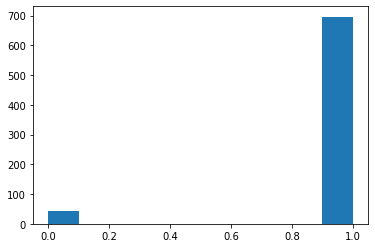

In [147]:
plt.hist(absentee['Absence'])

In [148]:
#Create feature and targets
# absentee.columns.values.tolist()
feature_cols  = ['Day of the week','Seasons','Transportation expense',
                 'Distance from Residence to Work','Service time','Age',
                 'Work load Average/day ','Hit target','Disciplinary failure',
                 'Education','Son','Social drinker','Social smoker','Pet',
                 'Weight','Height','Body mass index']
target = absentee['Absence']
X = absentee[feature_cols]
y = target

In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [150]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)

In [151]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [152]:
model = linear_model.Ridge()
model.fit(xtrain,y_train)

Ridge()

In [153]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(y_test,y_pred))


-152.02048936600016


<AxesSubplot:xlabel='Absence', ylabel='Density'>

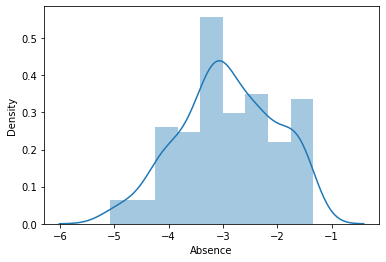

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(y_test-y_pred)

***Try GRIDSEARCHCV***

In [155]:
#define parameters

param = {
    'alpha':[.0001, 0.001,0.01, 0.01,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
       }

In [156]:
#define model
model =  linear_model.Ridge()

# define search
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)

# execute search
result = search.fit(xtrain, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9176724682508451
Best Hyperparameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'solver': 'sparse_cg'}


In [157]:
model =  linear_model.Ridge(alpha=0.01,fit_intercept= True, normalize = True, solver ='sparse_cg')

In [158]:
model.fit(xtrain,y_train)
y_pred = model.predict(xtest)
print(r2_score(y_test,y_pred))

0.8979448203786822


**RidgeCV for Ridge Regression**

In [159]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[0.001,0.01,1,10])
clf.fit(xtest,y_test)
clf.score(xtest,y_test)

0.9237670432533727

***LASSO REGRESSION***

In [160]:
reg = Lasso(alpha=1)
reg.fit(xtrain, y_train)

Lasso(alpha=1)

In [161]:
print('R squared training set', round(reg.score(xtrain, y_train)*100, 2))
print('R squared test set', round(reg.score(xtest, y_test)*100, 2))

R squared training set 0.0
R squared test set -0.09


In [162]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(xtrain)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 0.05
MSE test set 0.06


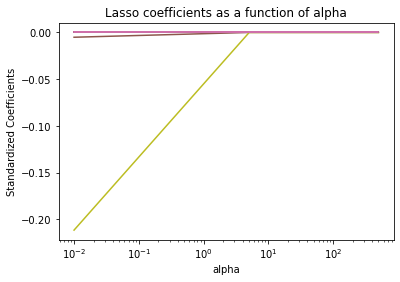

In [163]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(xtest,y_test)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [164]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(xtrain, y_train)

pred2 = model.predict(X_test)
print(mean_squared_error(y_test, pred2)) 

0.04091218059096992


In [165]:
model.alpha_

0.006757146229412136

In [166]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(xtrain, y_train)

Lasso(alpha=0.006757146229412136)

In [167]:
print(list(zip(lasso_best.coef_, X)))

[(0.0, 'Day of the week'), (0.0, 'Seasons'), (0.0, 'Transportation expense'), (0.0, 'Distance from Residence to Work'), (-0.0, 'Service time'), (-0.0, 'Age'), (-0.0, 'Work load Average/day '), (0.0, 'Hit target'), (-0.21431211466136627, 'Disciplinary failure'), (0.0, 'Education'), (-0.0, 'Son'), (-0.0, 'Social drinker'), (0.0, 'Social smoker'), (-0.0032704125587311207, 'Pet'), (-0.0, 'Weight'), (0.0, 'Height'), (-0.0012560946817962676, 'Body mass index')]


In [168]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 31.08
R squared test set 32.55


In [169]:
mean_squared_error(y_test, lasso_best.predict(xtest))

0.005428165320462842

***Elastic Net Regression***

In [170]:
#Define Model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [171]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [172]:
 #evaluate model
scores = cross_val_score(model, xtrain, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [173]:
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (statistics.mean(scores), statistics.stdev(scores)))

Mean MAE: 0.109 (0.019)
